In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import utils
import response_matrix

In [2]:
def find_first_crossing(ref, x):
    # TODO: maybe add interpolation function to hit the exact crossover point.
    out = []
    for i, (ui, xi) in enumerate(zip(ref, x)):
        if xi <= ui:
            out.append(i)
        else:
            break
    return out

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


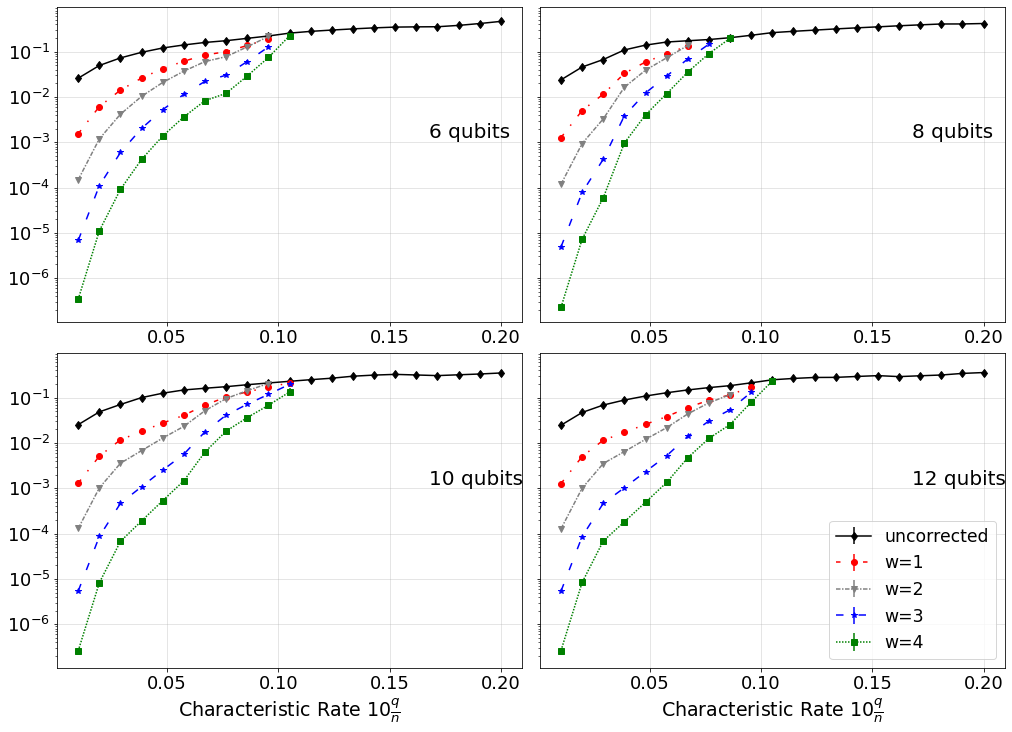

In [4]:
ntrials = 20
wvals = [1, 2, 3, 4]
nqubits_lst = [6, 8, 10, 12]
qvals = np.linspace(0.01, 0.2, 21)

plt.style.use('./style.mplstyle')
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True, sharey=True)

x = np.asarray([0] + wvals)

leglabs = [f"{x} qubits" for x in nqubits_lst]
markers = ['s', '*', 'v', 'o', 'd']
colors = ['k', 'r', 'gray', 'b', 'g']

# Second figure: plot trace distance asfu of characteristic q
leglabels = ["uncorrected"] + [f"w={w}" for w in wvals]
linestyles = ["solid", (0, (3, 7, 1, 7)), (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 1))]
markers_2 = list(reversed(markers)) # scramble these to avoid visual continuity

ax_list = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
n_qubits_list = [6, 8, 10, 12]

for n_qubits, ax in zip(n_qubits_list, ax_list):
    q_outcomes = np.load("experiments/{}qubits_scaling_results_3.npy".format(n_qubits))
    q_avg_outcomes = q_outcomes.mean(axis=2)
    q_var_outcomes = q_outcomes.std(axis=2) / np.sqrt(ntrials) # "standard error" = SD / sqrt(ntrials)
    # q_var_outcomes = q_outcomes.std(axis=2) # "standard error" = SD / sqrt(ntrials)
    for j, y in enumerate(q_avg_outcomes):
        mask = range(len(y))
        if j != 0:
            mask = find_first_crossing(q_avg_outcomes[0,:],y)

        confidence = q_var_outcomes[j][mask]
        ax.errorbar(qvals[mask], y[mask], yerr=confidence, label=leglabels[j], marker=markers_2[j], ls=linestyles[j], c=colors[j])
    
# Formatting for both
for i, ax in enumerate(ax_list):
    ax.text(0.8, 0.6, f"{n_qubits_list[i]} qubits", 
            horizontalalignment='left', verticalalignment='center', 
            transform=ax.transAxes, size=20)
    ax.grid(True, alpha=0.4)
    ax.semilogy()

for ax in axes[1,:]:
    ax.set_xlabel(r"Characteristic Rate $10\frac{q}{n}$")

axes[1,1].legend(leglabels)

fig.savefig("figures/truncated_inversion_q_study.pdf")

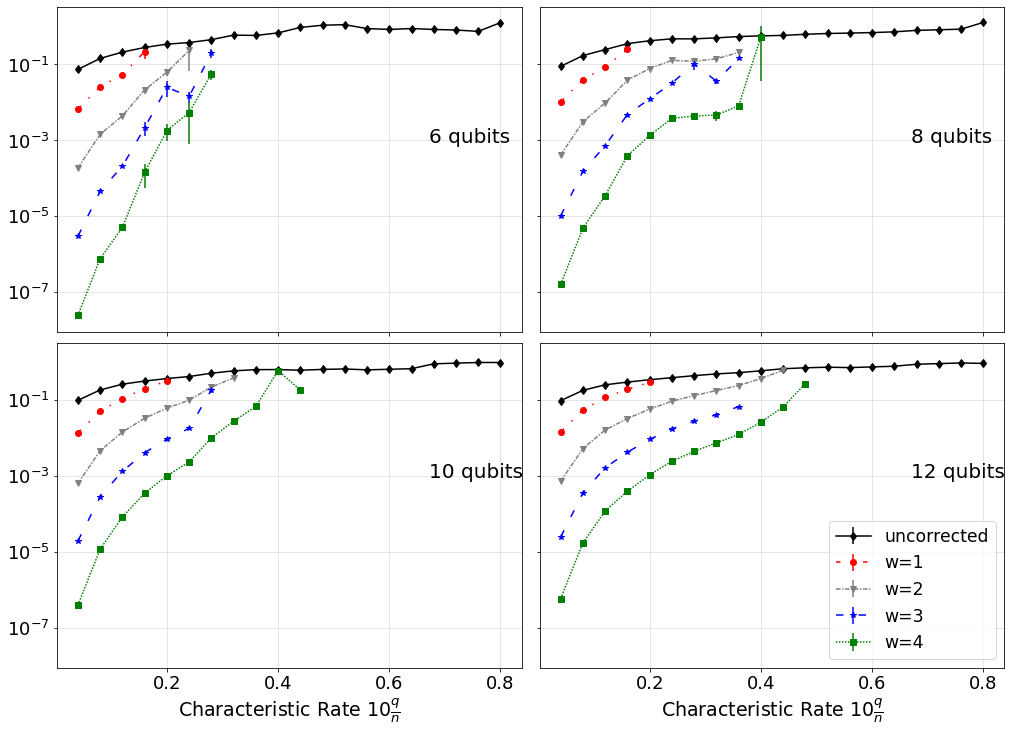

In [5]:
ntrials = 20
wvals = [1, 2, 3, 4]
nqubits_lst = [6, 8, 10, 12]
qvals = np.linspace(0.04, 0.8, 20)

plt.style.use('./style.mplstyle')
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True, sharey=True, sharex=True)

x = np.asarray([0] + wvals)

leglabs = [f"{x} qubits" for x in nqubits_lst]
markers = ['s', '*', 'v', 'o', 'd']
colors = ['k', 'r', 'gray', 'b', 'g']

# Second figure: plot trace distance asfu of characteristic q
leglabels = ["uncorrected"] + [f"w={w}" for w in wvals]
linestyles = ["solid", (0, (3, 7, 1, 7)), (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 1))]
markers_2 = list(reversed(markers)) # scramble these to avoid visual continuity

ax_list = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
n_qubits_list = [6, 8, 10, 12]

for n_qubits, ax in zip(n_qubits_list, ax_list):
    q_outcomes = np.load("experiments/{}qubits_scaling_results_3a.npy".format(n_qubits))
    q_avg_outcomes = q_outcomes.mean(axis=2)
    q_var_outcomes = q_outcomes.std(axis=2) / np.sqrt(ntrials) # "standard error" = SD / sqrt(ntrials)
    # q_var_outcomes = q_outcomes.std(axis=2) # "standard error" = SD / sqrt(ntrials)
    for j, y in enumerate(q_avg_outcomes):
        mask = range(len(y))
        if j != 0:
            mask = find_first_crossing(q_avg_outcomes[0,:],y)

        confidence = q_var_outcomes[j][mask]
        ax.errorbar(qvals[mask], y[mask], yerr=confidence, label=leglabels[j], marker=markers_2[j], ls=linestyles[j], c=colors[j])
#     ax.set_title('{nq} qubits'.format(nq=n_qubits))

# Formatting for both
for i, ax in enumerate(ax_list):
    ax.text(0.8, 0.6, f"{n_qubits_list[i]} qubits", 
            horizontalalignment='left', verticalalignment='center', 
            transform=ax.transAxes, size=20)
    ax.grid(True, alpha=0.4)
    ax.semilogy()

for ax in axes[1,:]:
    ax.set_xlabel(r"Characteristic Rate $10\frac{q}{n}$")

axes[1,1].legend(leglabels)

fig.savefig("figures/full_inversion_q_study.pdf")